In [1]:
#Please execute this cell
import jupman
from pprint import pprint
jupman.mem_limit()

Free mem: 1521 MB  Limiting to: 760 MB


# Exam -  Fri 12, Nov 2021 EXERCISES

**Scientific Programming - Data Science Master @ University of Trento**

<!-- ## [Download exercises and solutions](_static/generated/sciprog-ds-2021-11-12-exam.zip) 

**Fri 12, Nov 2021**: Published [exam solutions](exams/2021-11-12/solutions/exam-2021-11-12-sol.ipynb)
-->

## Part A - Mexican Drug Wars

<!--
[Dataverse](https://dataverse.harvard.edu/dataset.xhtml;jsessionid=1e404f3e090b7e5cb74d35948e40?persistentId=doi%3A10.7910%2FDVN%2FVIXNNE&version=&q=&fileTypeGroupFacet=&fileAccess=&fileTag=%22Data%22&fileSortField=name&fileSortOrder=desc)

Trejo, Guillermo; Ley, Sandra, 2019, "Replication Data for: High-Profile Criminal Violence. Why Drug Cartels Murder Government Officials and Party Candidates in Mexico", https://doi.org/10.7910/DVN/VIXNNE, Harvard Dataverse, V1, UNF:6:BcqInKD9NBX3NkI48CdqpQ== [fileUNF]  License: CC0 - "Public Domain Dedication" 

Coscia, Michele and Viridiana Rios (2012). Knowing Where and How Criminal Organizations Operate Using Web Content. CIKM, 12 (October – November).
https://www.michelecoscia.com/?page_id=1032

-->

Open Jupyter and start editing this notebook `exam-2021-11-12.ipynb`


## Attacks during elections

In the file [Dataset_HighProfileCriminalViolence.tab](Dataset_HighProfileCriminalViolence.tab)
are listed the number of attacks occurred to elected officials in Mexico from years 2007 to 2012. Focus only on columns `cve_inegi`, `state`, `year`,  `aggr_sum`, `elect_local`:

* Municipalities where the attack occurred are identified by a 5 digits `cve_inegi` code: first two digits indicate the state, 3 last ones the town. **NOTE**: first file entries only have 4 digits as the leading zero is implied, take care of this case
* `aggr_sum`: number of attacks occurred in a particular municipality / year.
* `elect_local`: `1.0` if a **local** election occurred in the year of the attack (ignore other `elect_*`)

## load_mexico

Extract Mexican state codes, names, the counts of attacks, and the years when **local** elections occurred, and RETURN a dictionary of dictionaries mapping **two digit** state codes **as strings** to the extracted info.

* use `csv.DictReader` with `delimiter='\t'` and `utf8` encoding (municipalities will look weird but we don't use them)
* use exactly 6 cells for `attacks` lists: assume all were carried out between `2007`and `2012` included
* **DO NOT** assume the years in rows repeat with a pattern, for example municipality `21132` has two successive 2012 years!

In [1]:
import csv
from pprint import pprint

def load(filename):
    
    # I declare the variables that I need to return the correct dictionary
    
    ret = {}
    id_municipality = ''
    
    # I open the file as f
    
    with open(filename, encoding='utf-8', newline='') as f:
        
        # I create a new variable and I assign it a csv DictReader with delimiter='\t' and utf8 encoding
        
        my_reader = csv.DictReader(f, delimiter='\t')  
        
        # I add into the dictionary the codes of each municipality
        
        for row in my_reader:
            
            # pprint(row)
            
            if len(row['cve_inegi']) == 4:
                id_municipality = "0" + row['cve_inegi'][0:1]              
            else:
                id_municipality = row['cve_inegi'][0:2]
                
            # if id_municipality is already in ret, it updates the values
            # else, id_municipality is added in ret
            
            if id_municipality in ret:
                if row['elect_local'] == '1.0' and ret[id_municipality]['local_election_years'].count(int(row['year'])) < 1:
                    ret[id_municipality]['local_election_years'].append(int(row['year']))
                
                #DAV STYLE: IF WALLS ARE BAD: YOU CAN DO BETTER THAN THIS .....                 
                if row['year'] == '2007':
                    ret[id_municipality]['attacks'][0] += int(row['aggr_sum'])
                if row['year'] == '2008':
                    ret[id_municipality]['attacks'][1] += int(row['aggr_sum'])
                if row['year'] == '2009':
                    ret[id_municipality]['attacks'][2] += int(row['aggr_sum'])
                if row['year'] == '2010':
                    ret[id_municipality]['attacks'][3] += int(row['aggr_sum'])
                if row['year'] == '2011':
                    ret[id_municipality]['attacks'][4] += int(row['aggr_sum'])
                if row['year'] == '2012':
                    ret[id_municipality]['attacks'][5] += int(row['aggr_sum'])
            else:
                ret[id_municipality] = {
                    'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [],
                    'state_code': id_municipality,
                    'state_name': row['state'],
                }
                
        for entities in ret:
            ret[entities]['local_election_years'] = sorted(ret[entities]['local_election_years'])
    return ret

mexico_db = load('Dataset_HighProfileCriminalViolence.tab')
# mexico_db


Complete expected output can be found in [expected_mexico_db.py](expected_mexico_db.py)

In [2]:
# TESTING
from pprint import pformat; from expected_mexico_db import expected_mexico_db
for sid in expected_mexico_db.keys():
    if sid not in mexico_db: print('\nERROR: MISSING state', sid); break    
    for k in expected_mexico_db[sid]:
        if k not in mexico_db[sid]:
            print('\nERROR at state', sid,'\n\n   MISSING key:', k); break    
        if expected_mexico_db[sid][k] != mexico_db[sid][k]:
            print('\nERROR at state', sid, 'key:',k)
            print('  ACTUAL:\n', pformat(mexico_db[sid][k]))
            print('  EXPECTED:\n', pformat(expected_mexico_db[sid][k]))
            break
if len(mexico_db) > len(expected_mexico_db):
    print('ERROR! There are more states than expected!')
    print('  ACTUAL:\n', len(mexico_db))
    print('  EXPECTED:\n', len(expected_mexico_db))

## show_attacks

Given a `state_code` and , display a chart of the attacks count over the years. 

- normalize the height so to have all charts as high as the maximum possible attack count in the db
- show vertical dashed lines in proximity of election years (use `linestyle='dashed'`), using the same color
- you are allowed to use constants for years

[4, 11, 11, 9, 3, 10]


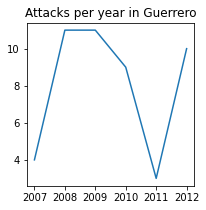

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_attacks(state_code, mexdb):
    
    maximum_value = 0
    
    for rows in mexdb:
        for elem in mexdb[rows]['attacks']:
            if elem > maximum_value:
                maximum_value = elem
                
    xs = ['2007', '2008', '2009', '2010', '2011', '2012']
    ys = mexdb[state_code]['attacks']
    # ys = [maximum_value]
    
    fig = plt.figure(figsize=(3, 3))
    
    pprint(mexdb[state_code]['attacks'])
    
    plt.title("Attacks per year in" + " " +mexico_db['12']['state_name'])
    plt.plot(xs, ys)

show_attacks('12', mexico_db)  # Guerrero

[0, 10, 10, 5, 39, 5]


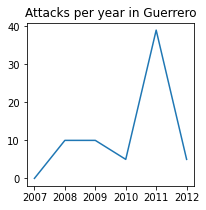

In [4]:
show_attacks('16', mexico_db)   # Michoacan

## Cartels

In the file [CosciaRios2012_DataBase.csv](CosciaRios2012_DataBase.csv) are listed attacks performed by  criminal organizations (cartels) in various years. For each row, the columns from 3-12 have a `1` if the corresponding cartel named in the header was involved in the attack, and `0` otherwise. Example:

Write a function which given a `filename` and a `year`, processes the dataset and RETURN a dictionary mapping cartel names to a list of **sorted** states (no duplicates) where the cartel performed attacks in the given `year`. 

- use a `csv.reader` with `utf8` encoding
- pick state code from `State` column and state names from previous `mexico_db` (you only need names) - if missing put state code (i.e. `09`)
- **NOTE**: `Sinaloa` is a special case, since it is both a state and a cartel.

In [5]:
import csv
from pprint import pprint

def cartels(filename, mexdb, year):
    
    #DAV CODE != DATA
    #    PLEASE AVOID LISTING CONSTANTS IN CODE UNLESS EXPLICITLY ALLOWED TO DO SO
    ret_cartels = {
        'Beltran_Leyva': [],
        'Beltran_Leyva_Family': [],
        'Familia': [],
        'Golfo': [],
        'Juarez': [],
        'Sinaloa': [],
        'Sinaloa_Family': [],
        'Otros': [],
        'Tijuana': [],
        'Zetas': []
    }
    
    with open(filename, encoding='utf-8', newline='') as f:
        my_reader = csv.reader(f, delimiter=',')
        
        for row in my_reader:
            # pprint(row)
            if row[2] == str(year):
                
                
                # In my mind this was a C switch/case. Should have more time to find
                # a more pythonic way to write that.
                
                #DAV: - IN MY MIND THIS IS A HORROR 
                #
                #     - YOU NEEDED A LOOP! ALWAYS AVOID CONSTANTS IF YOU CAN
                #     - DOESN'T FIX THE 0 CODES
                #     - DOESN'T APPEND STATE NAMES
                #     - DOESN'T CHECK FOR DUPLICATES
                #     - DOESN'T SORT
                
                if row[3] == '1':
                    ret_cartels['Beltran_Leyva'].append(row[1])
                if row[4] == '1':
                    ret_cartels['Beltran_Leyva_Family'].append(row[1])
                if row[5] == '1':
                    ret_cartels['Familia'].append(row[1])
                if row[6] == '1':
                    ret_cartels['Golfo'].append(row[1])
                if row[7] == '1':
                    ret_cartels['Juarez'].append(row[1])
                if row[8] == '1':
                    ret_cartels['Sinaloa'].append(row[1])
                if row[9] == '1':
                    ret_cartels['Sinaloa_Family'].append(row[1])
                if row[10] == '1':
                    ret_cartels['Tijuana'].append(row[1])
                if row[11] == '1':
                    ret_cartels['Zetas'].append(row[1])
                if row[12] == '1':
                    ret_cartels['Otros'].append(row[1])
                    
                
    pprint(ret_cartels)

    return ret_cartels
                
    
cartels2003 = cartels('CosciaRios2012_DataBase.csv', mexico_db, 2003)
assert cartels2003['Juarez'] == ['Durango', 'Guerrero', 'Jalisco', 'Sinaloa', 'Tamaulipas']
assert cartels2003['Familia'] == []
assert cartels2003['Sinaloa'] == ['Jalisco', 'Mexico', 'Nayarit', 'Nuevo Leon', 'Sinaloa', 'Sonora', 'Tamaulipas']
from pprint import pprint
pprint(cartels2003, width=120)

{'Beltran_Leyva': ['6', '17', '25', '25', '25'],
 'Beltran_Leyva_Family': [],
 'Familia': [],
 'Golfo': ['4',
           '5',
           '5',
           '5',
           '8',
           '8',
           '8',
           '10',
           '15',
           '15',
           '15',
           '19',
           '19',
           '24',
           '28',
           '28',
           '28',
           '28',
           '28',
           '28',
           '28',
           '28',
           '28',
           '30',
           '30',
           '30',
           '30',
           '30',
           '30',
           '31',
           '31'],
 'Juarez': ['2',
            '5',
            '5',
            '5',
            '5',
            '5',
            '6',
            '8',
            '8',
            '10',
            '10',
            '10',
            '12',
            '14',
            '14',
            '25',
            '28'],
 'Otros': ['30'],
 'Sinaloa': ['6',
             '7',
             '14',
             '

AssertionError: 

In [6]:
# further tests
expected2003 = {
 'Beltran_Leyva': ['Colima', 'Morelos', 'Sinaloa'],
 'Beltran_Leyva_Family':[],
 'Familia': [],
 'Golfo':   ['Campeche', 'Chihuahua', 'Coahuila', 'Durango', 'Mexico', 'Nuevo Leon', 'San Luis Potosi', 'Tamaulipas', 'Veracruz', 'Yucatan'],
 'Juarez':  ['Baja California', 'Chihuahua', 'Coahuila', 'Colima', 'Durango', 'Guerrero', 'Jalisco', 'Sinaloa', 'Tamaulipas'],
 'Otros':   ['Veracruz'],
 'Sinaloa': ['Chiapas', 'Colima', 'Jalisco', 'Mexico', 'Nayarit', 'Nuevo Leon', 'Sinaloa', 'Sonora', 'Tamaulipas'],
 'Sinaloa_Family': ['Guerrero'],
 'Tijuana': ['Aguascalientes', 'Baja California', 'Chiapas', 'Chihuahua', 'Coahuila', 'Guerrero', 'Jalisco', 'Mexico', 'Michoacan', 'Nuevo Leon', 'Puebla', 'Sinaloa', 'Sonora'],
 'Zetas':   ['Campeche', 'Guanajuato', 'Jalisco', 'Mexico', 'Nuevo Leon', 'Sinaloa', 'Tamaulipas', 'Veracruz', 'Yucatan']
}

assert cartels2003 == expected2003

expected1999 = {'Beltran_Leyva': [],
 'Beltran_Leyva_Family': [],
 'Familia': [],
 'Golfo':   ['Baja California', 'Guanajuato', 'Nuevo Leon', 'Puebla'],
 'Juarez':  ['Baja California', 'Chihuahua', 'Durango', 'Tamaulipas', 'Veracruz'],
 'Sinaloa': ['Jalisco', 'Veracruz'],
 'Sinaloa_Family': [],
 'Tijuana': ['Baja California', 'Campeche', 'Coahuila', 'Nuevo Leon', 'Sonora', 'Tamaulipas', 'Yucatan'],
 'Zetas':   ['Baja California', 'Mexico', 'Morelos', 'Sinaloa', 'Sonora'],
 'Otros':   []}
assert cartels('CosciaRios2012_DataBase.csv', mexico_db, 1999) == expected1999

AssertionError: 

In [11]:
#cartels('CosciaRios2012_DataBase.csv', mexico_db, 2004)  